In [2]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns
import scipy as sp

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

from aeon.transformations.collection.dictionary_based import PAA
import scipy.stats as stats

import sys
sys.path.append("../")

/Users/bzcschae/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [145]:
path_queries = "queries/"

files_queries = {    
    "LenDB_queries.bin" : [256, np.float32],
    "SCEDC_queries.bin" : [256, np.float32],
    "Meier2019JGR_queries.bin" : [256, np.float32],
    "SIFT1b_queries.bin" : [256, np.float32],
    "OBS_queries.bin" : [256, np.float32],
    "bigANN_queries.bin" : [100, np.uint8],    
    "Iquique_queries.bin" : [256, np.float32],
    "astro_queries.bin": [256, np.float32],    
    "ETHZ_queries.bin" : [256, np.float32],
    "OBST2024_queries.bin" : [256, np.float32],
    "ISC_EHB_DepthPhases_queries.bin" : [256, np.float32],
    "NEIC_queries.bin" : [256, np.float32],
    "SALD_queries.bin" : [256, np.float32],    
    "deep1b_queries.bin" : [96, np.float32],    
    "PNW_queries.bin" : [256, np.float32],
}    

path = "../data_head/"

LenDB_queries.bin   	 False
SCEDC_queries.bin   	 False
Meier2019JGR_queries.bin   	 False
SIFT1b_queries.bin   	 False
OBS_queries.bin   	 False
bigANN_queries.bin   	 False
Iquique_queries.bin   	 False
astro_queries.bin   	 False
ETHZ_queries.bin   	 False
OBST2024_queries.bin   	 False
ISC_EHB_DepthPhases_queries.bin   	 False
NEIC_queries.bin   	 False
SALD_queries.bin   	 False
deep1b_queries.bin   	 False
PNW_queries.bin   	 False


/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3146: RuntimeWarning: invalid value encountered in divide
  z = (scores - mn) / std


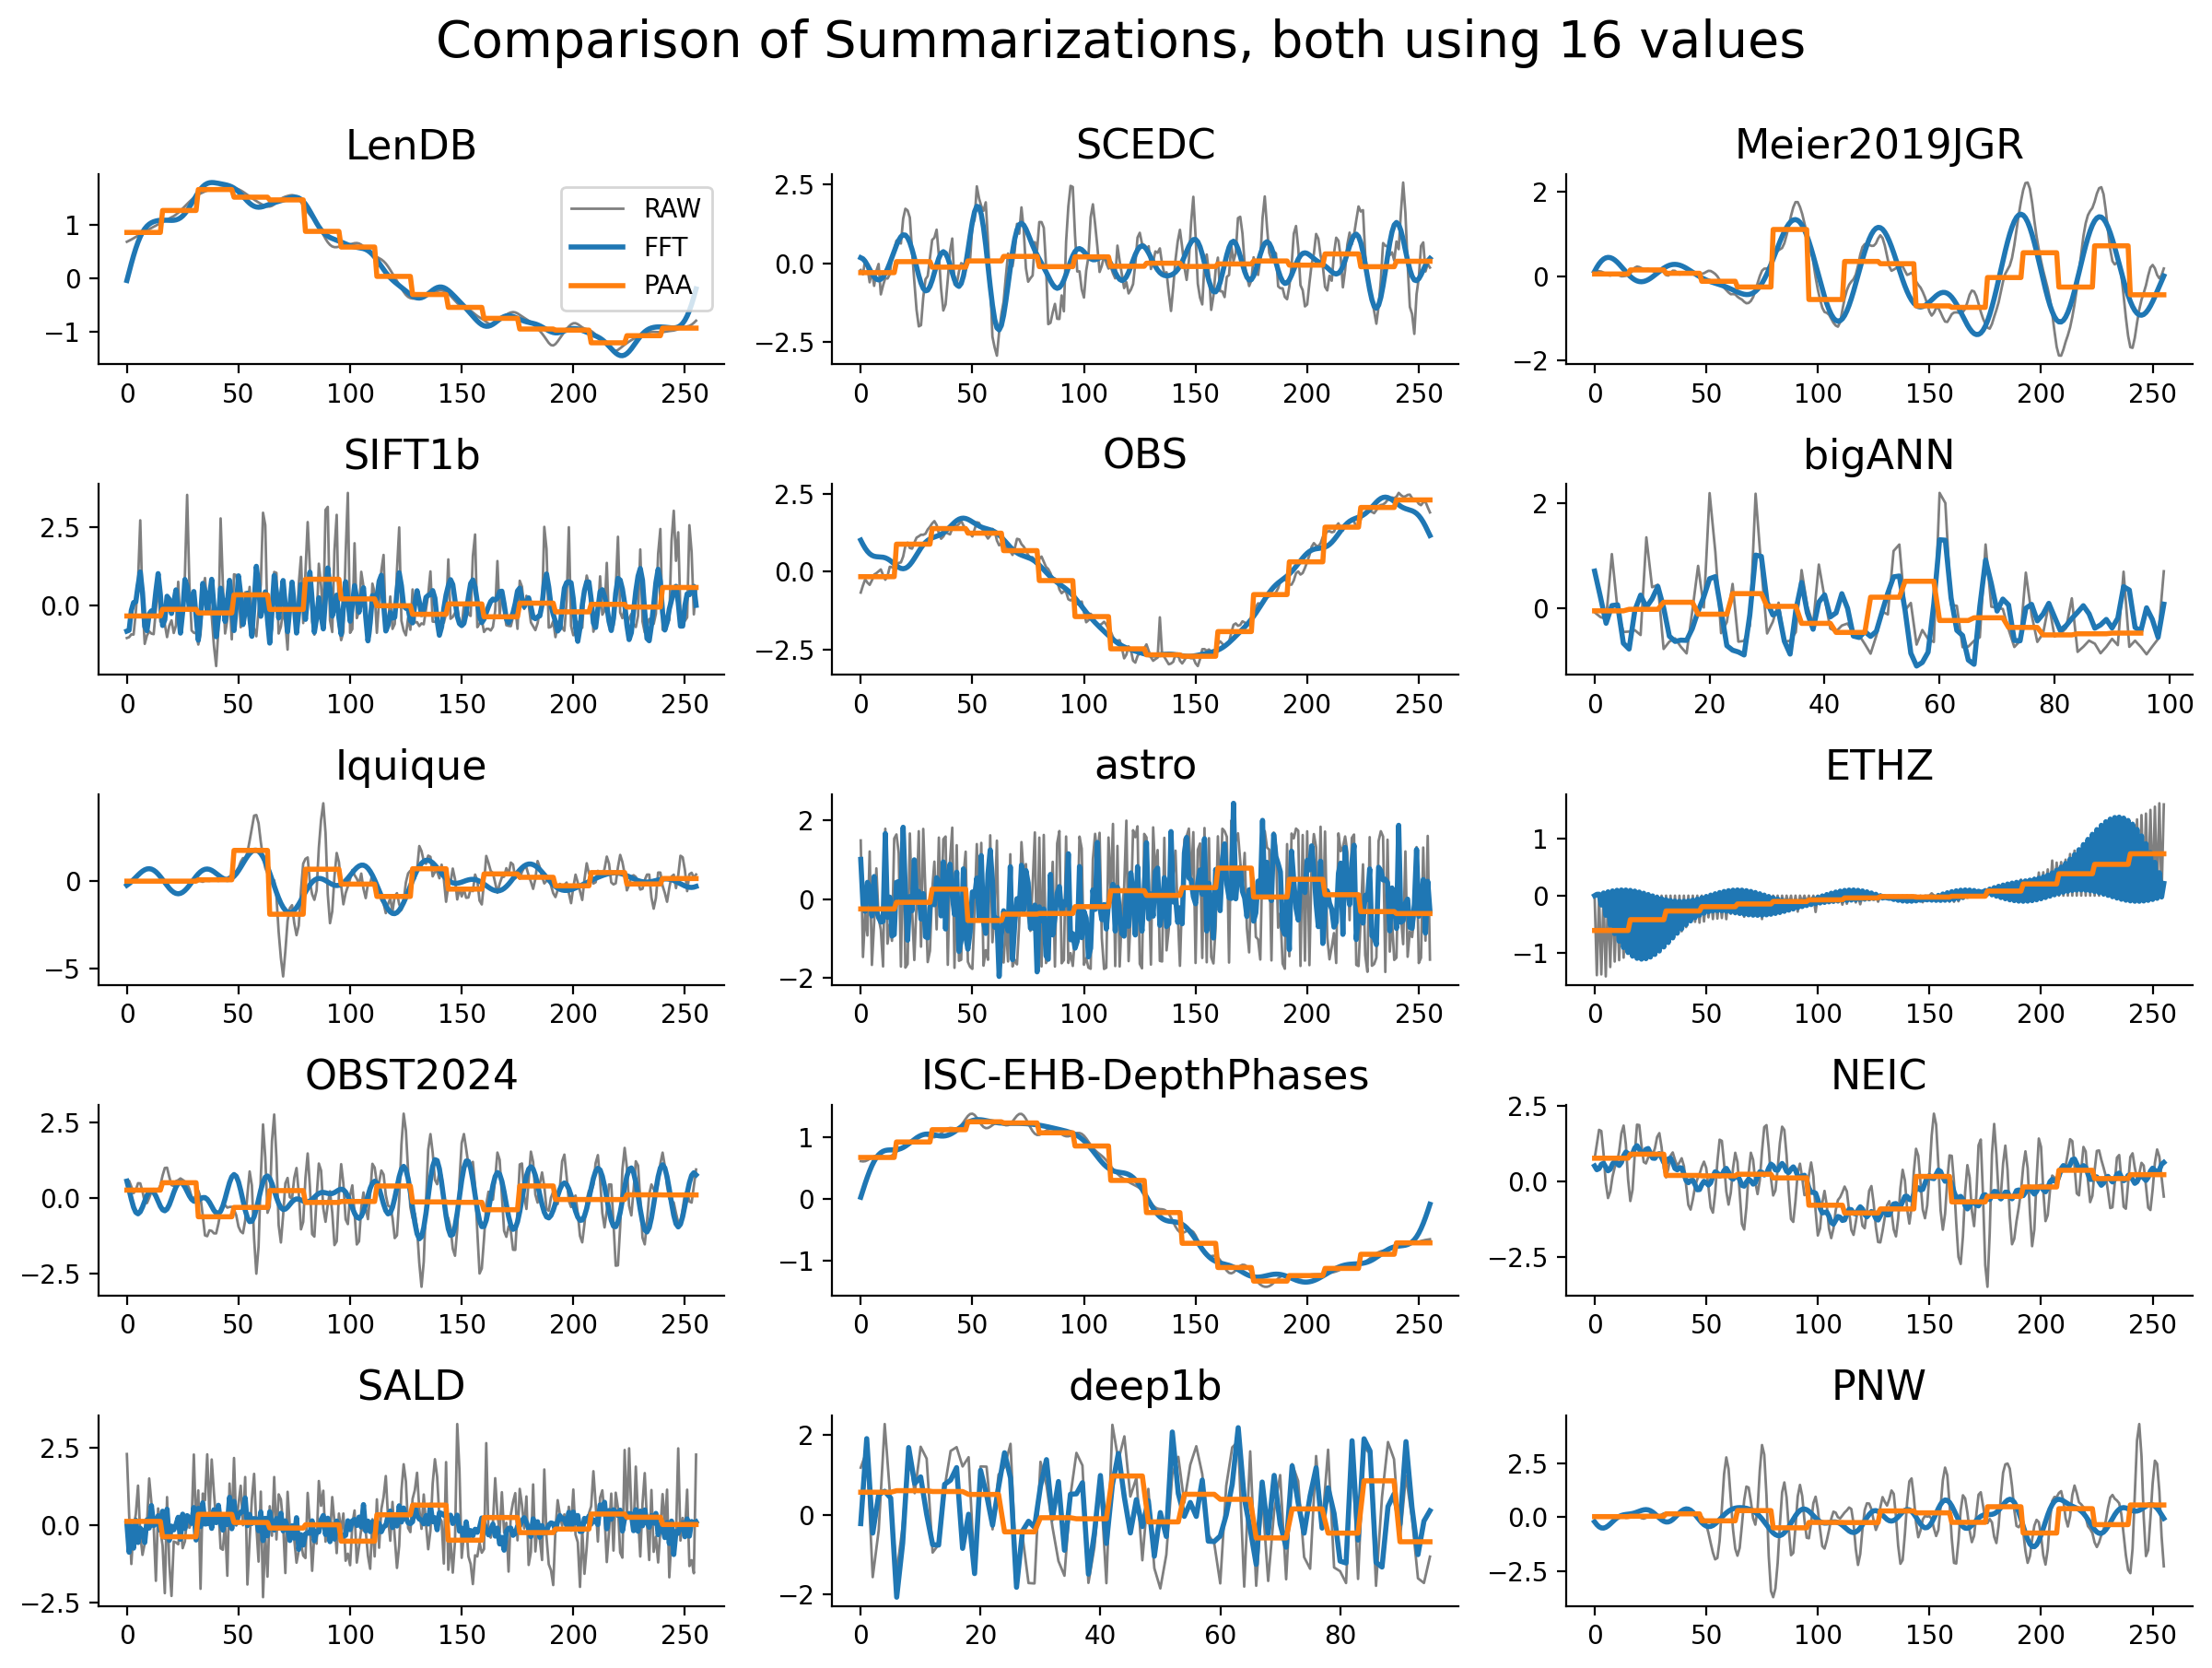

In [151]:
import warnings
warnings.filterwarnings("ignore", category=np.ComplexWarning)

fig, axes = plt.subplots(int( np.ceil(len(files_queries) / 3)), 3, figsize=(12, 9))

segments = 16
paa = PAA(n_segments=segments)
id = 3

for i, key in enumerate(files_queries):    
    file = path_queries + key
    length, data_type = files_queries[key]
    
    data = np.nan_to_num(np.fromfile(file, dtype=data_type))
    ## data = np.fromfile(file, dtype=np.float32)
    print(key, "  \t", np.isnan(data).any())

    data = (data[:len(data)-len(data)%length].reshape(-1, length)).T
    data = np.nan_to_num(sp.stats.zscore(data, axis = 1))

    paa_data = paa.fit_transform(data.T).squeeze(1)
    paa_data = paa_data[id,:]
    paa_data = np.repeat(paa_data, len(data)/len(paa_data))

    dft = fp.rfft(data.T)
    dft_variance = np.var(dft, axis=0)
    support = np.argsort(-dft_variance)[: segments + 1]
    support = np.sort(support)

    fft = fp.rfft(data[:,id])
    dft = np.zeros(fft.shape[0])
    dft[0] = fft[0]
    dft[support] = fft[support]

    fft_data = fp.irfft(dft)
    
    ax = axes.flatten()[i]
    sns.lineplot(data=data[:,id], ax = ax, lw=1, alpha=0.5, label="RAW", color="black")
    sns.lineplot(data=fft_data, ax = ax, lw=2, label="FFT")
    sns.lineplot(data=paa_data, ax = ax, lw=2, label="PAA")
    sns.despine()
    ax.set_title(key.replace("_queries", "").replace(".bin", "").replace("_", "-"), size=16)
    
    if i >= 1:
        ax.legend([],[], frameon=False)
        # plt.legend(False)

    # print(np.std(data), np.mean(data

# fig.subplots_adjust(top=0.9)
fig.suptitle("Comparison of Summarizations, both using " + str(segments) + " values", y=1.0, size=20)
plt.tight_layout()

plt.savefig("images/data_fft_paa.pdf", bbox_inches='tight')
plt.show()


/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/Users/bzcschae/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/bzcschae/miniconda3/lib/python3.10/site

<Figure size 640x480 with 0 Axes>

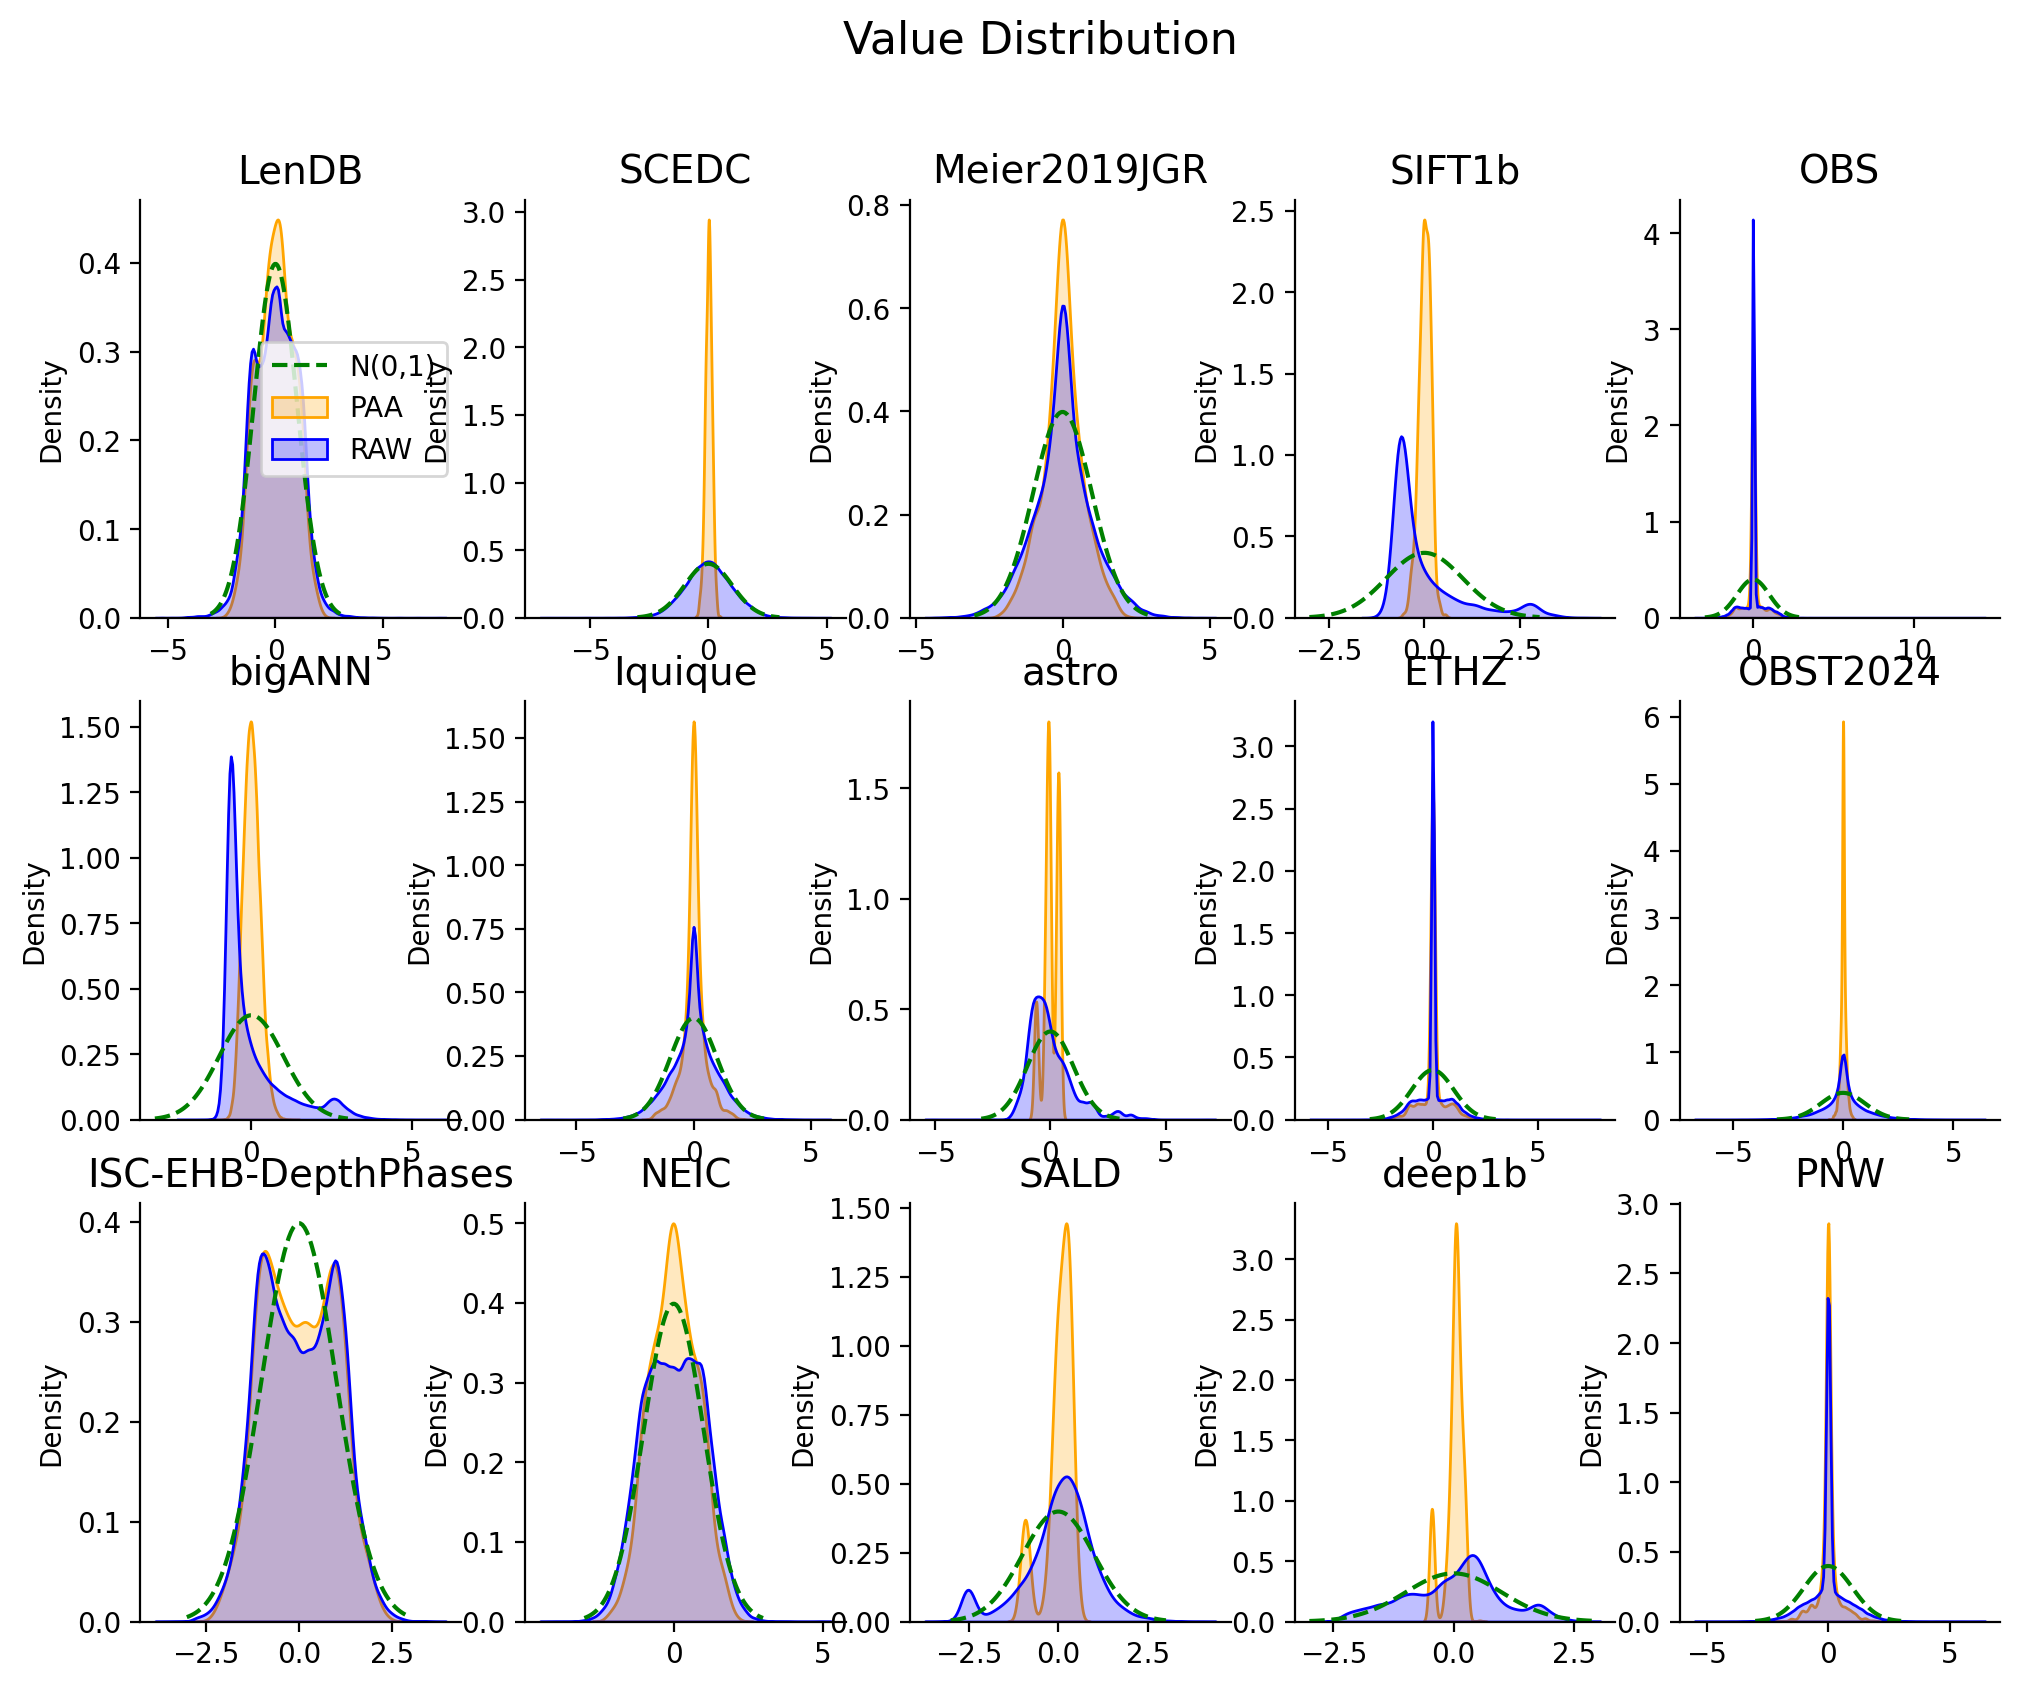

In [152]:


def plot_files(all_files, file_path): 
    paa = PAA(n_segments=8)
    fig, axes = plt.subplots(int( np.ceil(len(files_queries) / 5)), 5, figsize=(12, 9))

    for i, key in enumerate(files_queries.keys()):
        file = path_queries + key
        # print(path_queries, file)
        
        length, data_type = files_queries[key]        
        data = np.nan_to_num(np.fromfile(file, dtype=data_type))
    
        data = (data[:len(data)-len(data)%length].reshape(-1, length))# [:100,:]
        data_normed = np.nan_to_num(sp.stats.zscore(data, axis=1))
                    
        x = np.linspace(0 - 3, 0 + 3, 100)
    
        ax = axes.flatten()[i]
        sns.lineplot(x=x, y=stats.norm.pdf(x, 0, 1), ax=ax, linestyle="--", color="green", label="N(0,1)")

        try : 
            paa_data = paa.fit_transform(data_normed)
            sns.kdeplot(data=paa_data.flatten(), ax = ax, label="PAA", color="orange", common_norm=False, fill=True)
        except:
            print("Error with PAA", key)
            # print (data[-1])
            print(key, "  \t", np.isnan(data).any())            
            print(key, "  \t", np.isfinite(data).any())
        
        sns.kdeplot(data=data_normed.flatten(), ax = ax, label="RAW", color="blue", common_norm=False, fill=True)
    
        ax.legend()
        ax.set_title(key.replace("_queries", "").replace(".bin", "").replace("_", "-").replace("-head", ""), size=14)    
        sns.despine()
        if i >=1:
            ax.legend([],[], frameon=False)

    fig.subplots_adjust(top=0.9)
    fig.suptitle("Value Distribution", y=1.00, size=16)
    # print(np.std(data), np.mean(data))
    

plt.tight_layout()
plot_files(files, path)
plt.savefig("images/distribution_data.pdf", bbox_inches='tight')
plt.show()